In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
print(df_top10.index)


Index(['2016 Q4', '2017 Q1', '2017 Q2', '2017 Q3', '2017 Q4', '2018 Q1',
       '2018 Q2', '2018 Q3', '2018 Q4', '2019 Q1', '2019 Q2', '2019 Q3',
       '2020 Q1', '2024 Q1', '2024 Q2', '2024 Q3'],
      dtype='object')


<Figure size 1200x600 with 0 Axes>

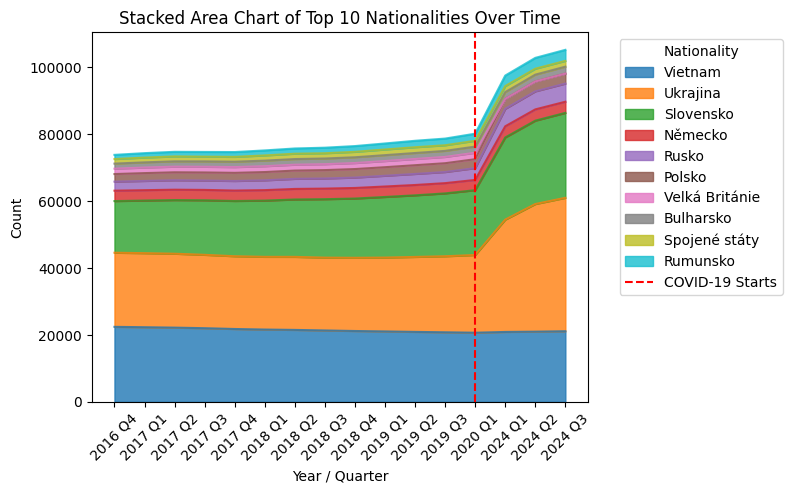

In [25]:

# Load the dataset (assuming it's a CSV)
df = pd.read_csv("New_way_CSV/merged_sums.csv", index_col=0)

# Select only the first 10 rows, except the first one (Czech Republic)
df_top10 = df[1:11]

# Transpose the DataFrame so columns become the X-axis
df_top10 = df_top10.T  

# Remove duplicates from the index if any
df_top10 = df_top10.loc[~df_top10.index.duplicated(keep='first')]

# Plot stacked area chart
plt.figure(figsize=(12, 6))
ax = df_top10.plot(kind="area", stacked=True, colormap="tab10", alpha=0.8)

# Set the x-ticks to match the quarter format
plt.xticks(ticks=range(len(df_top10.index)), labels=df_top10.index, rotation=45)

# Adding vertical lines for key events using x-tick positions
# Ensure the quarters exist in the cleaned-up index before plotting vertical lines
if '2020 Q1' in df_top10.index:
    plt.axvline(x=df_top10.index.get_loc('2020 Q1'), color='red', linestyle='--', label="COVID-19 Starts")
if '2022 Q1' in df_top10.index:
    plt.axvline(x=df_top10.index.get_loc('2022 Q1'), color='blue', linestyle='--', label="Ukraine Invasion")

# Labels & Title
plt.xlabel("Year / Quarter")
plt.ylabel("Count")
plt.title("Stacked Area Chart of Top 10 Nationalities Over Time")
plt.legend(title="Nationality", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show plot
plt.show()


<Figure size 1200x600 with 0 Axes>

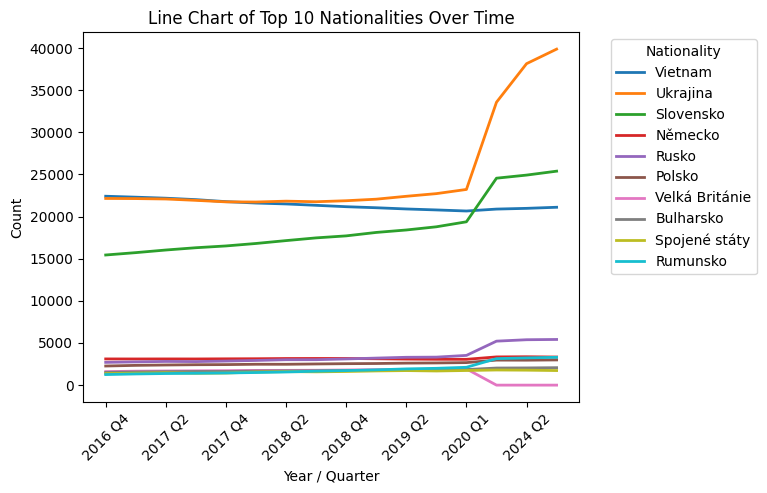

In [6]:
# Plot line chart
plt.figure(figsize=(12, 6))
df_top10.plot(kind="line", colormap="tab10", linewidth=2)

# Labels & Title
plt.xlabel("Year / Quarter")
plt.ylabel("Count")
plt.title("Line Chart of Top 10 Nationalities Over Time")
plt.legend(title="Nationality", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)

# Show plot
plt.show()

<Figure size 1200x600 with 0 Axes>

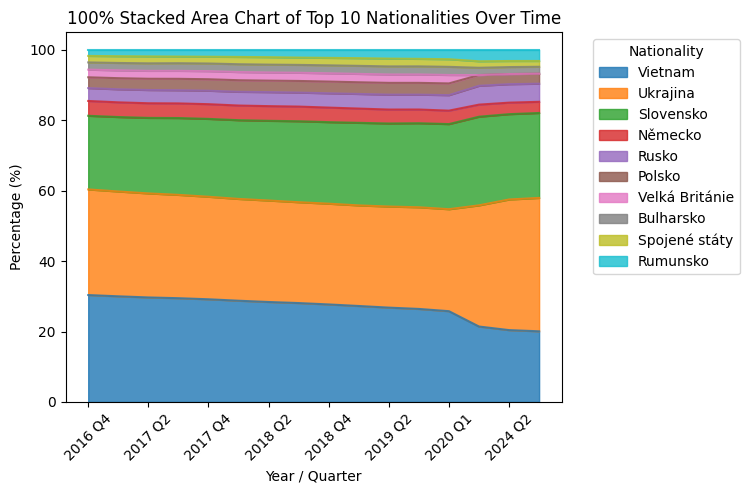

In [7]:
# Normalize each column to sum up to 100% (percentage of total for each time period)
df_top10_percentage = df_top10.div(df_top10.sum(axis=1), axis=0) * 100

# Plot 100% stacked area chart
plt.figure(figsize=(12, 6))
df_top10_percentage.plot(kind="area", stacked=True, colormap="tab10", alpha=0.8)

# Labels & Title
plt.xlabel("Year / Quarter")
plt.ylabel("Percentage (%)")
plt.title("100% Stacked Area Chart of Top 10 Nationalities Over Time")
plt.legend(title="Nationality", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)

# Show plot
plt.show()